# Clustering

The process of organizing objects into groups whose members are similar in some way

In [2]:
from IPython.display import Image
Image(url="https://miro.medium.com/max/720/0*9ksfYh14C-ARETav.")

## Wine DataSet


**Abstract:** Using chemical analysis determine the origin of wines


**Data Set Characteristics:**

Multivariate

Number of Instances: 178

Attribute Characteristics: Integer, Real

Number of Attributes: 13


**Source:**

Original Owners:

Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.


**Data Set Information:**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1) Alcohol\
2) Malic acid\
3) Ash\
4) Alcalinity of ash\
5) Magnesium\
6) Total phenols\
7) Flavanoids\
8) Nonflavanoid phenols\
9) Proanthocyanins\
10) Color intensity\
11) Hue\
12) OD280/OD315 of diluted wines\
13) Proline

In [3]:
from IPython.display import Image
Image(url="https://i0.wp.com/mojoandmoxie.ca/wp-content/uploads/2019/09/cropped-IMG_5890-2.jpeg?resize=720%2C406&ssl=1")

## Table of Contents
1. Import Libraries
2. Checking DataSet
3. Exploratory Data Analysis
4. Data Visualisation
5. clustering Tendency
6. clustering\
i) Kmeans\
ii) Agglomerative Clustering\
 iii) Affinity propagation\
iv) DBSCAN


## 1. Import Libraries

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
import scipy.cluster.hierarchy as sch

import plotly.express as px





%matplotlib inline

### 2. Checking DataSet

In [5]:
df = pd.read_csv("D:\\program\\Python\\projects\\ML\\CLUSTERING\\wine-clustering.CSV")

In [6]:
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

### 3.Exploratory Data Analysis

In [7]:
df.describe().T

count        mean         std     min       25%  \
Alcohol               178.0   13.000618    0.811827   11.03   12.3625   
Malic_Acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Ash_Alcanity          178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total_Phenols         178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_Phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins       178.0    1.590899    0.572359    0.41    1.2500   
Color_Intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD280                 178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
Alcohol                13.050   13.6775    14.83  
Malic_Acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Ash_Alcanity           19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total_Phenols           2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid_Phenols    0.340    0.4375     0.66  
Proanthocyanins         1.555    1.9500     3.58  
Color_Intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD280                   2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

In [8]:
print("Shape of the dataframe",df.shape)
print("duplicated Value count",df.duplicated().sum())
analys = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
    
})
display(analys)

Shape of the dataframe (178, 13)
duplicated Value count 0


Unique  Null  NullPercent     Type
Alcohol                  126     0          0.0  float64
Malic_Acid               133     0          0.0  float64
Ash                       79     0          0.0  float64
Ash_Alcanity              63     0          0.0  float64
Magnesium                 53     0          0.0    int64
Total_Phenols             97     0          0.0  float64
Flavanoids               132     0          0.0  float64
Nonflavanoid_Phenols      39     0          0.0  float64
Proanthocyanins          101     0          0.0  float64
Color_Intensity          132     0          0.0  float64
Hue                       78     0          0.0  float64
OD280                    122     0          0.0  float64
Proline                  121     0          0.0    int64

There is no duplicate value is found. No Null Values.

### 4. Data Visualisation

**Spread of variables**

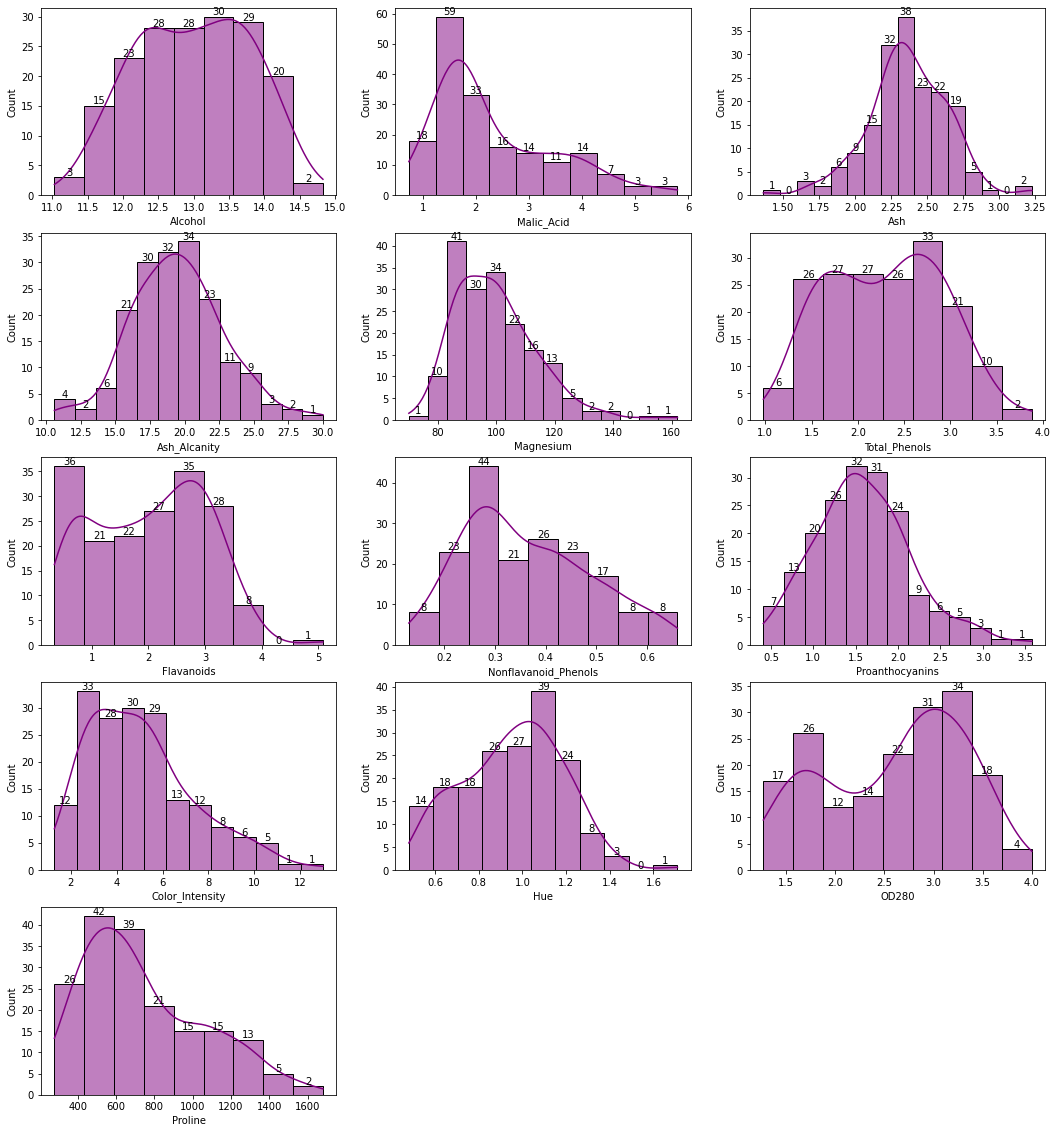

In [9]:
plot = 1
plt.figure(figsize=(18,20))
for i in df.columns: 
    plt.subplot(5,3,plot)
    ax = sns.histplot(data = df , x = i , kde = True, palette="bright",color="purple" )
    plt.xlabel(i)
    plot+=1
    for i in ax.containers:     #to set a label on top of the bars.
        ax.bar_label(i,)

#### Outlier Observation Analysis

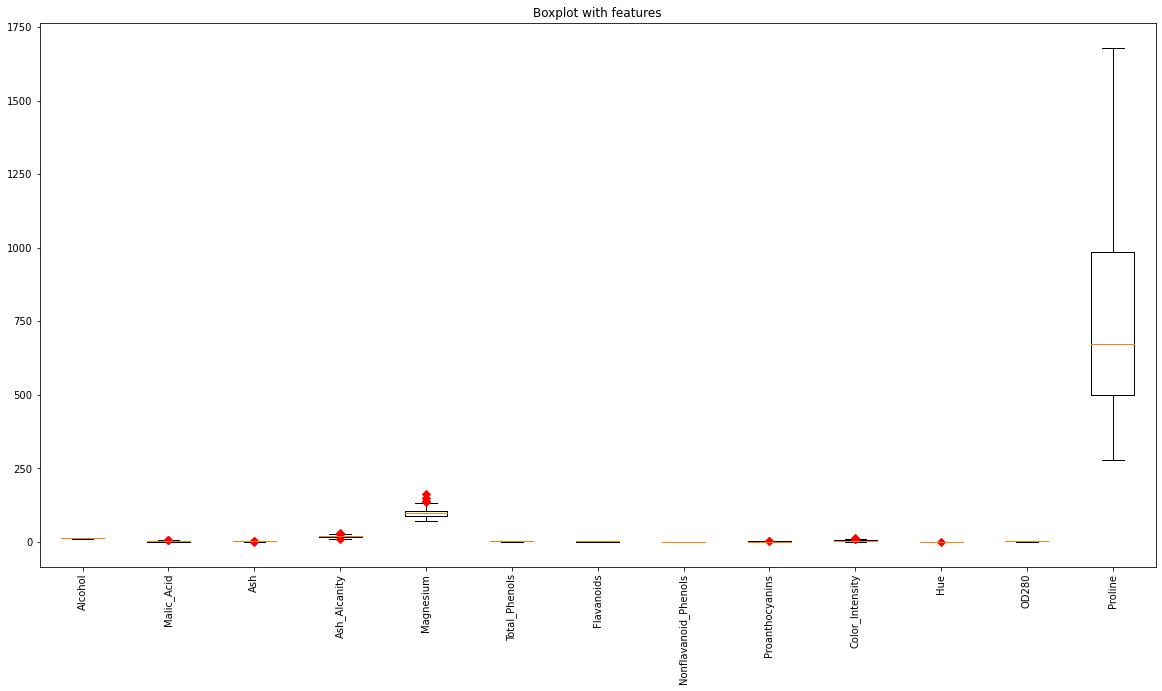

In [10]:
ls_features = list(df.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(df.values, 0, 'rD', labels = ls_features)
plt.xticks(rotation = 90)

plt.show()

No Outlier are present

#### corelation of other variables with alcohol

In [11]:
df.corr()["Alcohol"].sort_values()

Ash_Alcanity           -0.310235
Nonflavanoid_Phenols   -0.155929
Hue                    -0.071747
OD280                   0.072343
Malic_Acid              0.094397
Proanthocyanins         0.136698
Ash                     0.211545
Flavanoids              0.236815
Magnesium               0.270798
Total_Phenols           0.289101
Color_Intensity         0.546364
Proline                 0.643720
Alcohol                 1.000000
Name: Alcohol, dtype: float64

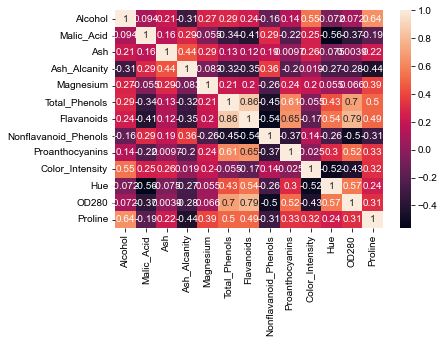

In [12]:
sns.heatmap(df.corr(), annot=True)
sns.set(rc= {"figure.figsize": (8, 8)})

In [13]:
df.corr()["Ash"].sort_values()

Hue                    -0.074667
OD280                   0.003911
Proanthocyanins         0.009652
Flavanoids              0.115077
Total_Phenols           0.128980
Malic_Acid              0.164045
Nonflavanoid_Phenols    0.186230
Alcohol                 0.211545
Proline                 0.223626
Color_Intensity         0.258887
Magnesium               0.286587
Ash_Alcanity            0.443367
Ash                     1.000000
Name: Ash, dtype: float64

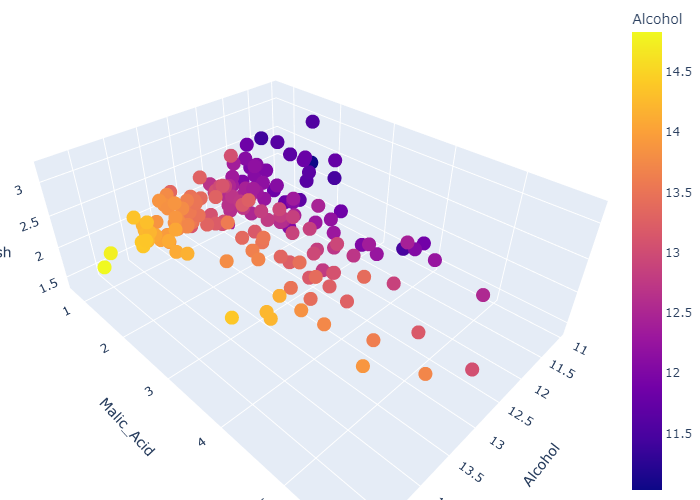

In [79]:
import plotly.express as px
fig=px.scatter_3d(df, x='Alcohol', y='Malic_Acid', z='Ash',
              color='Alcohol')
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show("png")


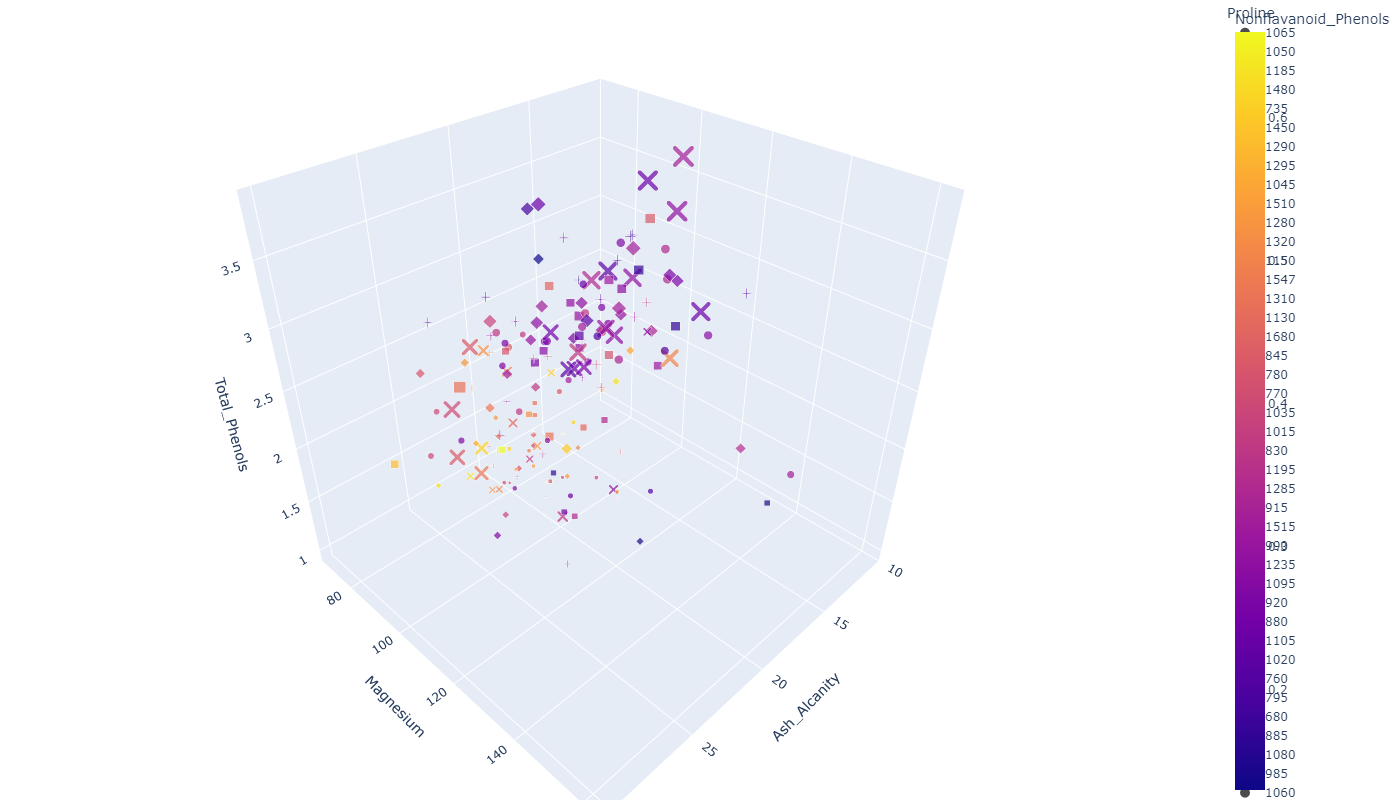

In [78]:
fig = px.scatter_3d(df, x='Ash_Alcanity', y='Magnesium', z='Total_Phenols',
              color='Nonflavanoid_Phenols', size='Flavanoids', size_max=18,
              symbol='Proline', opacity=0.7,width=1400,height=800)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show("png")

Visualize sprean of the data

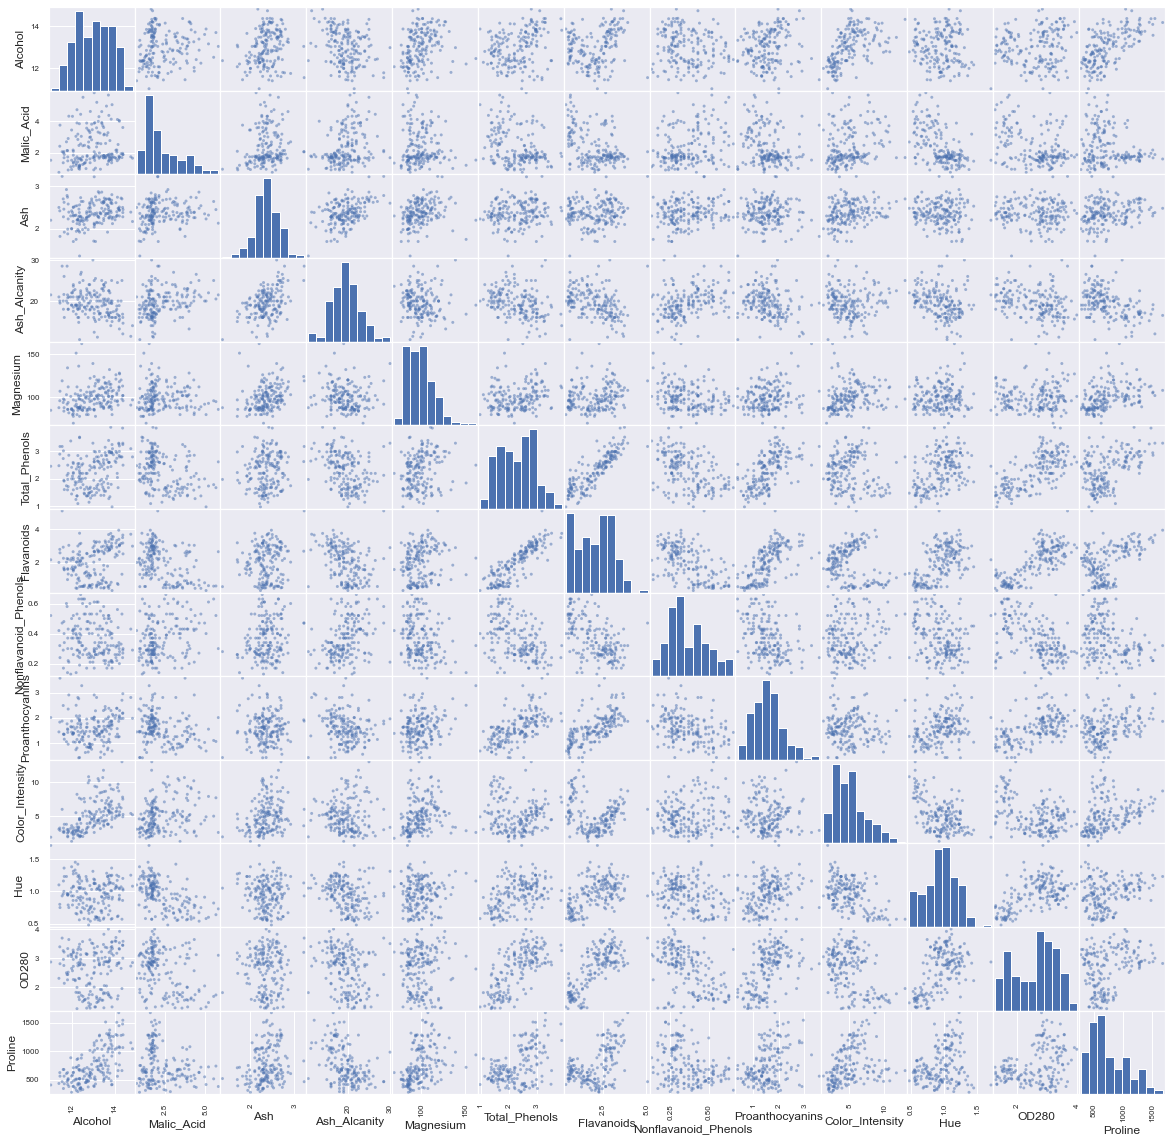

In [16]:
pd.plotting.scatter_matrix(df,figsize=(20,20))
plt.show()

In [17]:
s=df.corr()["Alcohol"].sort_values()
s

Ash_Alcanity           -0.310235
Nonflavanoid_Phenols   -0.155929
Hue                    -0.071747
OD280                   0.072343
Malic_Acid              0.094397
Proanthocyanins         0.136698
Ash                     0.211545
Flavanoids              0.236815
Magnesium               0.270798
Total_Phenols           0.289101
Color_Intensity         0.546364
Proline                 0.643720
Alcohol                 1.000000
Name: Alcohol, dtype: float64

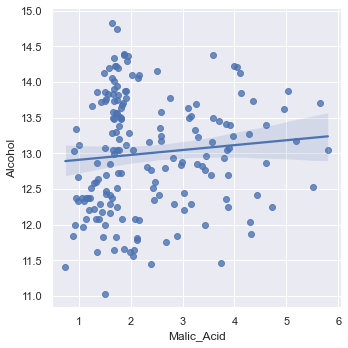

In [18]:

sns.lmplot(x = "Malic_Acid", y ="Alcohol", data = df)

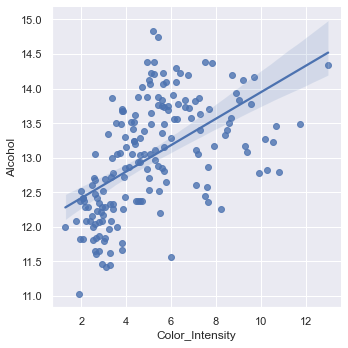

In [19]:

sns.lmplot(x = "Color_Intensity", y ="Alcohol", data = df)

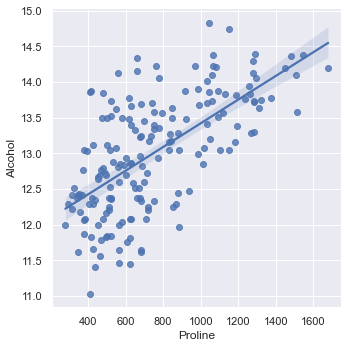

In [20]:

sns.lmplot(x = "Proline", y ="Alcohol", data = df)

## 5. clustering Tendency

To find clustering Tendency we have to apply Hopkins statistics.
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered

In [21]:
from sklearn.neighbors import NearestNeighbors 
from random import sample
from math import isnan
from sklearn.preprocessing import scale
from numpy.random import uniform

In [22]:
def hopkins_statistic(X,k=2):
    
    X=X.values  #convert dataframe to a numpy array
    X = scale(X)
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
  
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
     #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=k)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=k)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [23]:
H=hopkins_statistic(df,3)
print('Hopkins statistic: '+str(H))

Hopkins statistic: 0.7117781825174821


The Hopkins statistic is not greater than 0.75, but it is close to it, so we have a suspision that there could be clusters.

## 6. clustering

In [24]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN



### Model Training

preprocessiing

In [25]:
from sklearn.preprocessing import StandardScaler
float_columns = [x for x in df.columns]
sc = StandardScaler()
df2 = df.copy()
x=df[float_columns]
df_scaled = sc.fit_transform(df[float_columns])

df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [26]:
x

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [27]:
dfbackup=df.copy()
dfbackup

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [28]:
df_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
# Create principal components
pca = PCA(n_components=5)  
X_pca = pca.fit_transform(df_scaled)



In [31]:
#convert X_pca to DF
X_pca = pd.DataFrame(X_pca)
X_pca2=X_pca.copy()

X_pca

0         1         2         3         4
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655
2    2.516740 -1.031151  0.982819  0.724902 -0.251033
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842
4    1.008908 -0.869831  2.026688 -0.409766  0.298458
..        ...       ...       ...       ...       ...
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164
174 -2.601956 -1.757229  0.207581  0.349496  0.255063
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193

[178 rows x 5 columns]

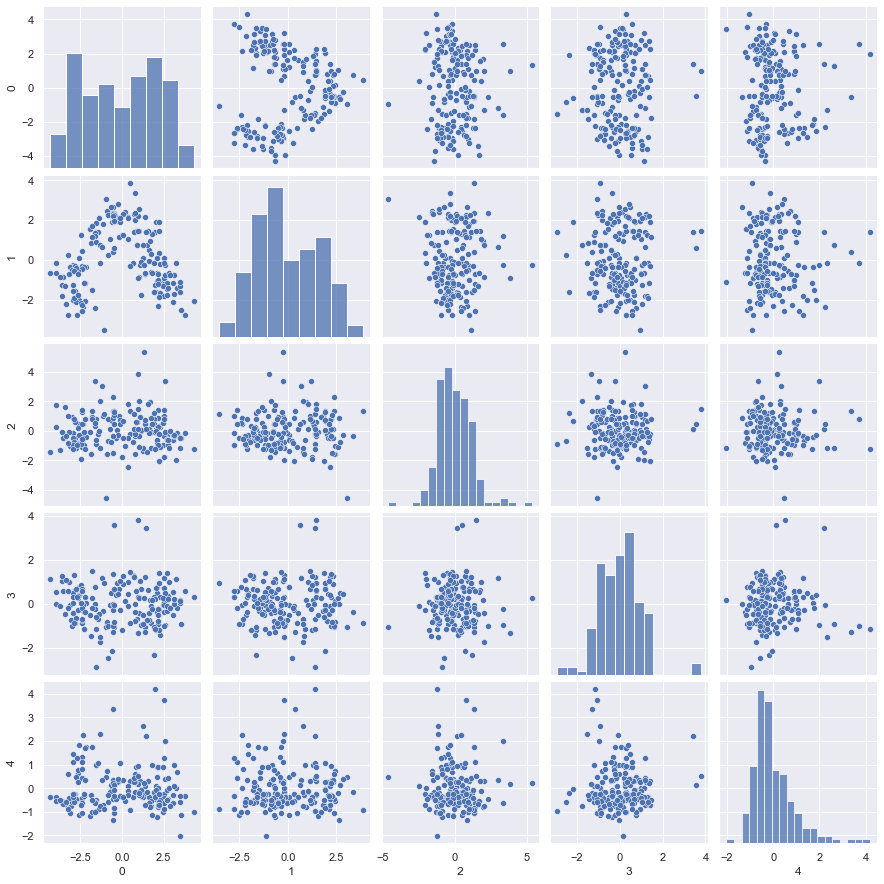

In [32]:
sns.pairplot(
             X_pca,
             diag_kind='hist',
             corner=False,
             palette='cividis',
            )




### i. K-Means¶


In [33]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/720/1*fz-rjYPPRlGEMdTI-RLbDg.webp")

In [34]:
# Kmeans clustering
distortions = []
cluster_range = range(1,21)

# elbow method
for i in cluster_range:
    model = KMeans(n_clusters=i,   random_state=42)
    model.fit(df_scaled)
    distortions.append(model.inertia_)

C:\Users\deepi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



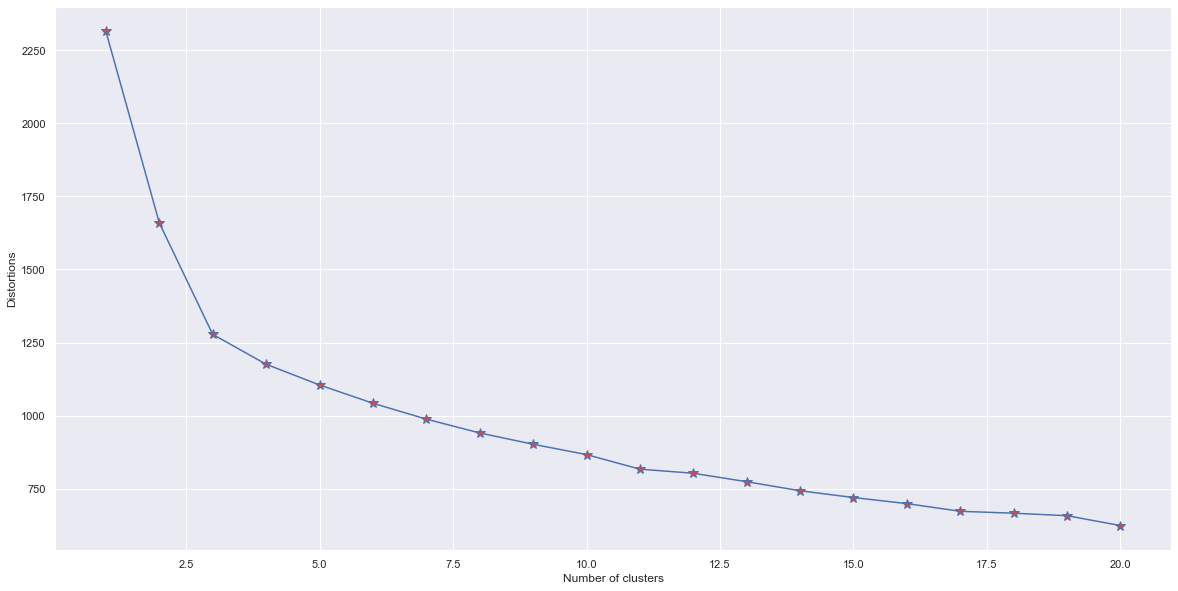

In [35]:
plt.figure(figsize=(20,10))

plt.plot(cluster_range,distortions , marker='*',ms=10,mfc="r")
plt.xlabel("Number of clusters")
plt.ylabel('Distortions')


plt.show()

By using the Elbow method, the most accurate cluster number may be 3

In [36]:
model=KMeans(n_clusters=3,random_state=3)
y_means=model.fit_predict(df_scaled)

In [37]:
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [38]:
df['kmeans'] = y_means

In [39]:
df['kmeans']

0      1
1      1
2      1
3      1
4      1
      ..
173    2
174    2
175    2
176    2
177    2
Name: kmeans, Length: 178, dtype: int32

In [40]:
df['kmeans'].value_counts()

0    65
1    62
2    51
Name: kmeans, dtype: int64

visualization

In [41]:
df_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [42]:
df.corr()["kmeans"].sort_values()

Hue                    -0.625279
OD280                  -0.583962
Flavanoids             -0.442838
Total_Phenols          -0.314711
Proanthocyanins        -0.304539
Ash_Alcanity            0.109458
Magnesium               0.196574
Proline                 0.197458
Nonflavanoid_Phenols    0.274168
Ash                     0.291415
Alcohol                 0.479720
Malic_Acid              0.489905
Color_Intensity         0.745700
kmeans                  1.000000
Name: kmeans, dtype: float64

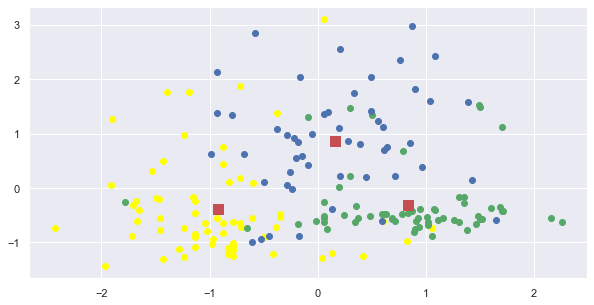

In [43]:
plt.figure(figsize=(10,5))

plt.scatter(df_scaled[y_means==0,0],df_scaled[y_means==0,1],c='yellow',label='C1')

plt.scatter(df_scaled[y_means==1,0],df_scaled[y_means==1,1],c='g',label='C2')

plt.scatter(df_scaled[y_means==2,0],df_scaled[y_means==2,1],c='b',label='C1')
fig=plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,marker='s',label='centroids',c='r')




There is too much of overlapping clusters.we will try with PCA

## PCA

In [44]:
kmeansPCA = KMeans(n_clusters=3, random_state=42)
kmeansPCA = kmeansPCA.fit(X_pca2)
X_pca2['kmeans PCA'] = kmeansPCA.labels_
X_pca2.head()


0         1         2         3         4  kmeans PCA
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043           1
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655           1
2  2.516740 -1.031151  0.982819  0.724902 -0.251033           1
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842           1
4  1.008908 -0.869831  2.026688 -0.409766  0.298458           1

In [45]:
X_pca2['kmeans PCA'].value_counts()

2    65
1    62
0    51
Name: kmeans PCA, dtype: int64

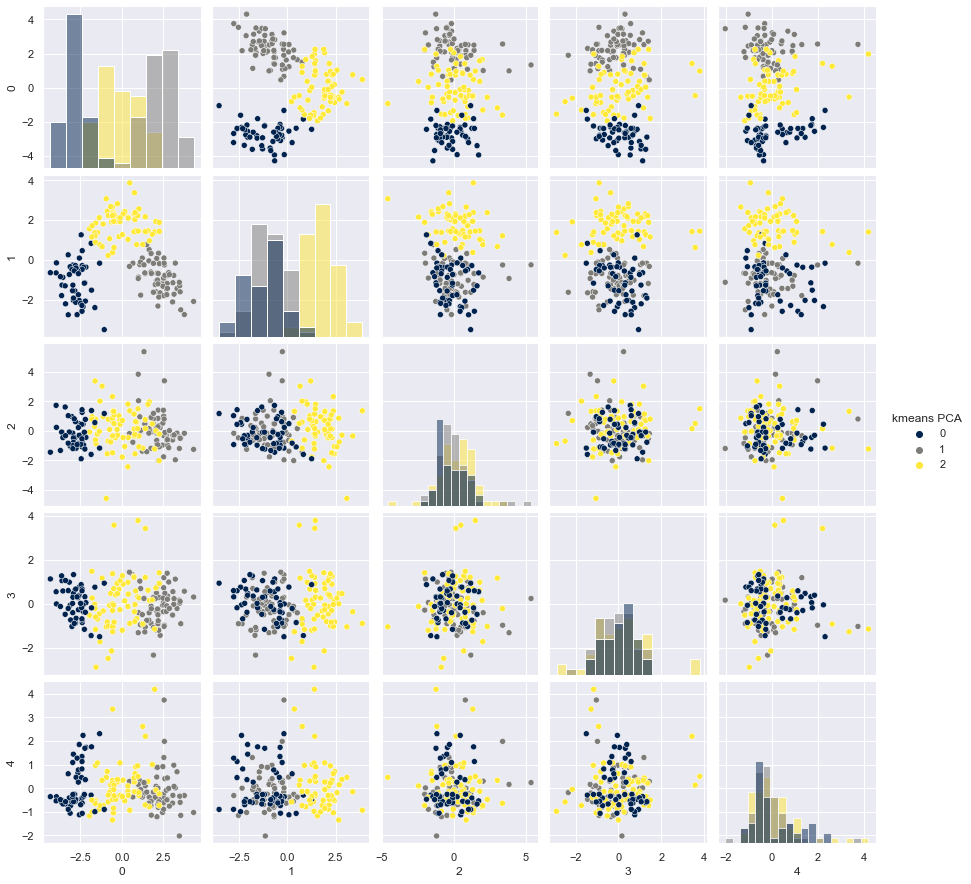

In [46]:
sns.pairplot(
             X_pca2,
             diag_kind='hist',
             corner=False,
             palette='cividis',
             hue="kmeans PCA"
            )




we will choose 2 componants for PCA

In [47]:
X_PCA_A= PCA(n_components=2)  
X_PCA_A = X_PCA_A.fit_transform(df_scaled)
#convert X_pca to DF
X_PCA_A = pd.DataFrame(X_PCA_A)

kmeansPCA = KMeans(n_clusters=3, random_state=42)
kmeansPCA = kmeansPCA.fit(X_PCA_A)
X_PCA_A['kmeans PCA'] = kmeansPCA.labels_
X_PCA_A.head()


0         1  kmeans PCA
0  3.316751 -1.443463           1
1  2.209465  0.333393           1
2  2.516740 -1.031151           1
3  3.757066 -2.756372           1
4  1.008908 -0.869831           1

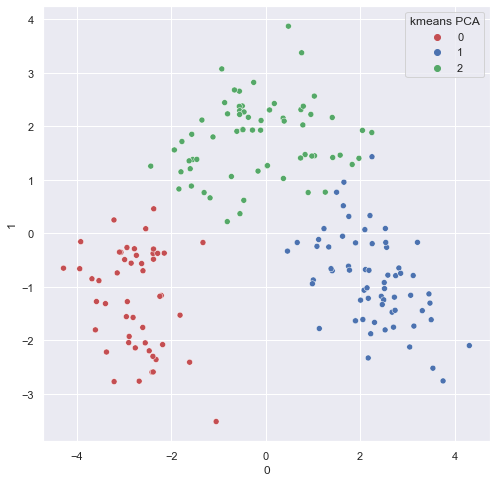

In [48]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=0, y=1, hue='kmeans PCA', data=X_PCA_A,palette=["r","b","g"]);

we got pretty good clusters with PCA

### ii) Agglomerative Clustering

In [49]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/1400/0*CBb_vzMzxXj0OTpg.")

In [50]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=True)
ag = ag.fit(df_scaled)
agglom=ag.fit_predict(df_scaled)
df['agglom'] = ag.fit_predict(df_scaled)

In [51]:
df['agglom'].value_counts()

2    64
0    58
1    56
Name: agglom, dtype: int64

In [52]:
df.corr()["agglom"].sort_values()

Ash_Alcanity           -0.341131
Nonflavanoid_Phenols   -0.227171
Malic_Acid             -0.002427
Hue                     0.040086
Proanthocyanins         0.175571
OD280                   0.196266
Ash                     0.371412
Magnesium               0.394625
Flavanoids              0.404572
Total_Phenols           0.406775
Color_Intensity         0.442207
kmeans                  0.460463
Alcohol                 0.746625
Proline                 0.763516
agglom                  1.000000
Name: agglom, dtype: float64

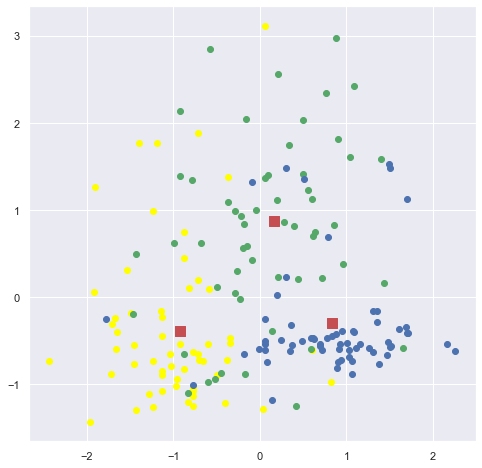

In [53]:
plt.scatter(df_scaled[agglom==0,0],df_scaled[agglom==0,1],c='yellow',label='C1')

plt.scatter(df_scaled[agglom==1,0],df_scaled[agglom==1,1],c='g',label='C2')

plt.scatter(df_scaled[agglom==2,0],df_scaled[agglom==2,1],c='b',label='C1')
fig=plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,marker='s',label='centroids',c='r')


Again overlapping

In [54]:
X_PCA_Ag= PCA(n_components=2)  
X_PCA_Ag = X_PCA_Ag.fit_transform(df)
#convert X_pca to DF
X_PCA_Ag = pd.DataFrame(X_PCA_Ag)

AgglomerativeClusteringPCA = AgglomerativeClustering(n_clusters=3)
AgglomerativeClustering = AgglomerativeClusteringPCA.fit(X_PCA_A)
X_PCA_A['AgglomerativeClustering PCA'] = AgglomerativeClusteringPCA.labels_
X_PCA_A.head()


0         1  kmeans PCA  AgglomerativeClustering PCA
0  3.316751 -1.443463           1                            2
1  2.209465  0.333393           1                            2
2  2.516740 -1.031151           1                            2
3  3.757066 -2.756372           1                            2
4  1.008908 -0.869831           1                            2

In [55]:
X_PCA_A['AgglomerativeClustering PCA'].value_counts()

0    65
2    64
1    49
Name: AgglomerativeClustering PCA, dtype: int64

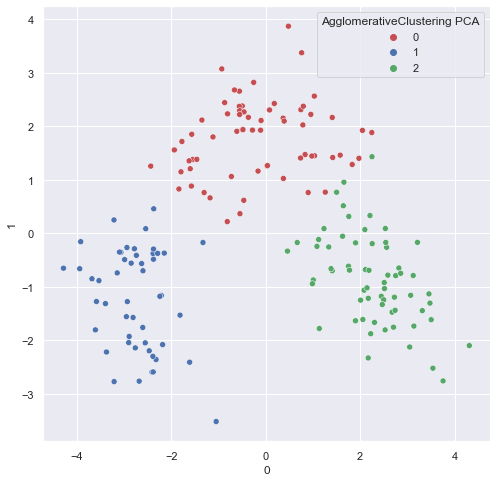

In [56]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=0, y=1, hue='AgglomerativeClustering PCA', data=X_PCA_A,palette=["r","b","g"]);

### Dendrogram

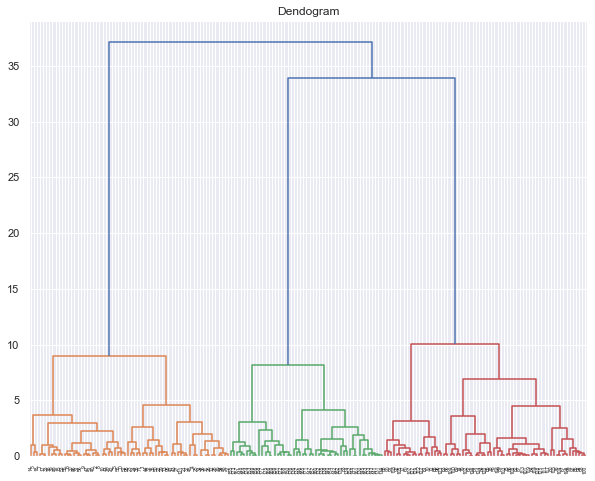

In [58]:
import scipy.cluster.hierarchy as hier
plt.figure(figsize=(10, 8))
dendogram = hier.dendrogram(hier.linkage(X_PCA_A, method='ward'))
plt.title('Dendogram')

plt.show()

In [59]:
X_PCA_A.drop("kmeans PCA",axis=1,inplace=True)
X_PCA_A

0         1  AgglomerativeClustering PCA
0    3.316751 -1.443463                            2
1    2.209465  0.333393                            2
2    2.516740 -1.031151                            2
3    3.757066 -2.756372                            2
4    1.008908 -0.869831                            2
..        ...       ...                          ...
173 -3.370524 -2.216289                            1
174 -2.601956 -1.757229                            1
175 -2.677839 -2.760899                            1
176 -2.387017 -2.297347                            1
177 -3.208758 -2.768920                            1

[178 rows x 3 columns]

In [62]:
#import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly

In [64]:

names=list(X_PCA_A['AgglomerativeClustering PCA'])
dendro = ff.create_dendrogram(X_PCA_A,labels=names)
dendro['layout'].update({'width':1500, 'height':600})
d=plotly.offline.iplot(dendro, filename='simple_dendrogram')
plt.show("png")

Taking a look at the Dendrogram, we see that cutting horizontally the largest vertical line

In [65]:
X_PCA_A

0         1  AgglomerativeClustering PCA
0    3.316751 -1.443463                            2
1    2.209465  0.333393                            2
2    2.516740 -1.031151                            2
3    3.757066 -2.756372                            2
4    1.008908 -0.869831                            2
..        ...       ...                          ...
173 -3.370524 -2.216289                            1
174 -2.601956 -1.757229                            1
175 -2.677839 -2.760899                            1
176 -2.387017 -2.297347                            1
177 -3.208758 -2.768920                            1

[178 rows x 3 columns]


**In both cases as we made the clusters, the same conclusions could be made. These two algorithms seem to have worked really well.**

## Affinity propagation

In [66]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/1400/1*XtbBoNBdH6X8bS1IBwA2Wg.png")

In [67]:
ap = AffinityPropagation(random_state = 1)
identified_clusters = ap.fit_predict(df_scaled)
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

In [68]:
clusterdata=df2.copy()
clusterdata['Cluster'] = identified_clusters

In [69]:
X_PCA_A["Cluster"]=identified_clusters

n_clusters_ = len(identified_clusters)

In [70]:
clusterdata

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Cluster  
0     3.92     1065        4  
1     3.40     1050        0  
2     3.17     1185        2  
3     3.45     1480        4  
4     2.93      735        1  
..     ...      ...      ...  
173   1.74      740       12  
174   1.56      750       12  
175   1.56      835       12  
176   1.62      840       12  
177   1.60      560       12  

[178 rows x 14 columns]

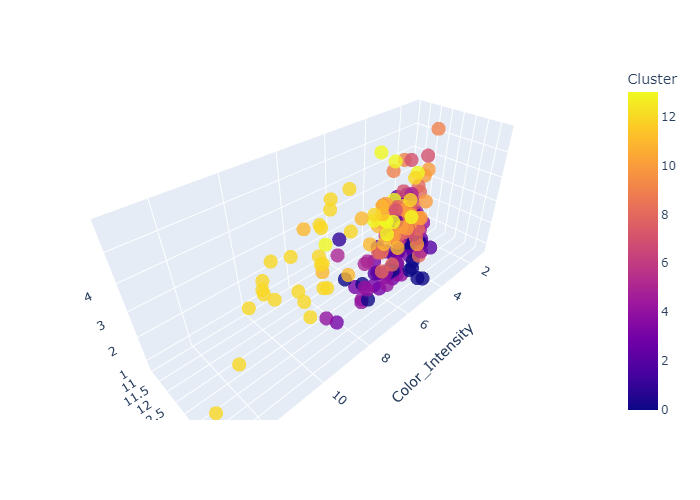

In [77]:
fig = px.scatter_3d(clusterdata, x = 'Color_Intensity', y='Alcohol', z='Malic_Acid',
              color='Cluster', opacity = 0.8,  size_max=30)
fig.show("png")


<AxesSubplot:xlabel='0', ylabel='1'>

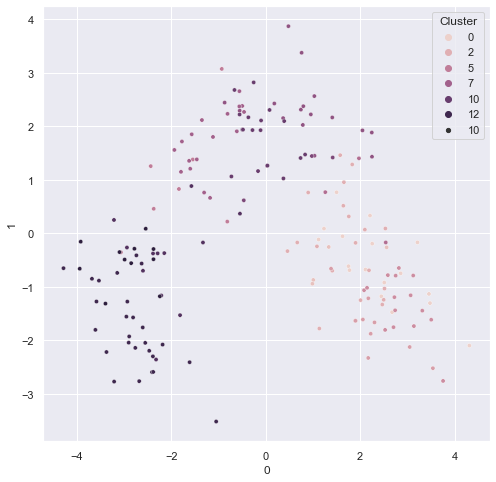

In [72]:
sns.scatterplot(data=X_PCA_A,x = 0, y=1,hue='Cluster',size=10)

highly overlapping

Affinity propagation is not ideal for our dataset

## iv) DBSCAN



In [73]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png")

It is a density based clustering algorithm

In [74]:
DBS = DBSCAN(eps = 9, min_samples = 12)

identified_clusters = DBS.fit_predict(df_scaled)

data_with_clusters=df2.copy()
data_with_clusters['Cluster'] = identified_clusters

In [75]:
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

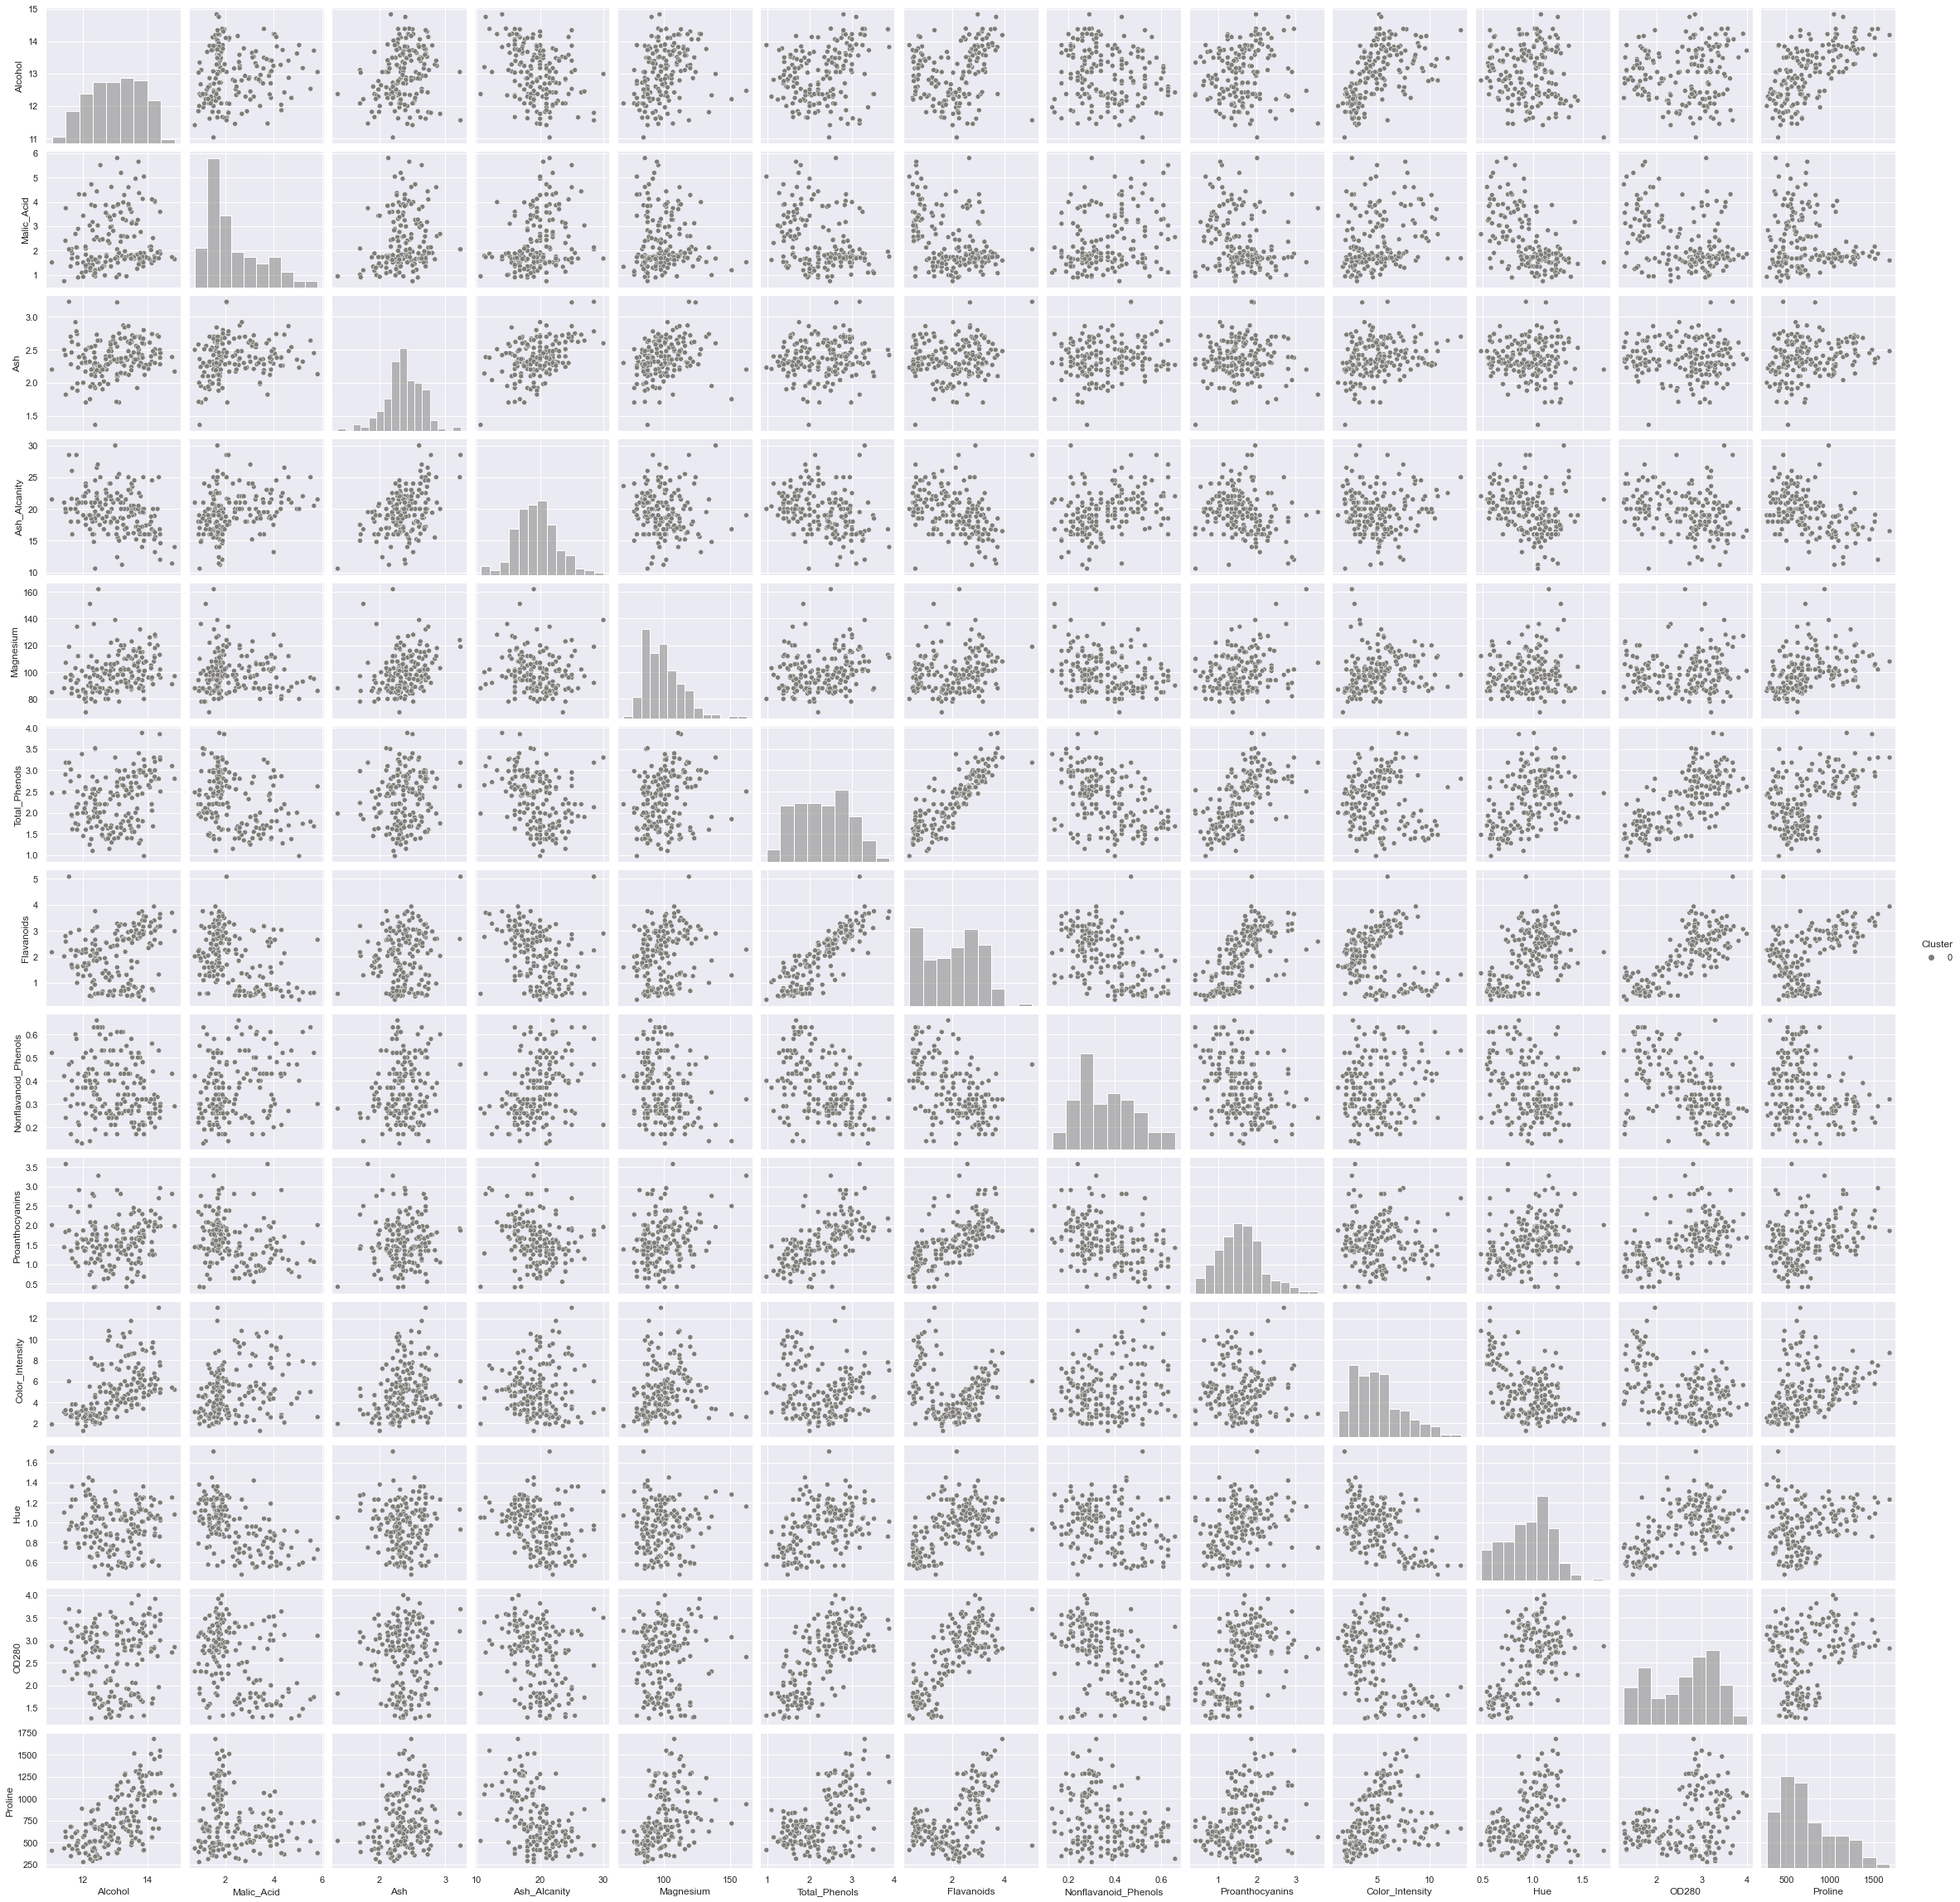

In [76]:
sns.pairplot(
             data_with_clusters,
             diag_kind='hist',
             corner=False,
             palette='cividis',
             hue="Cluster"
            )



No clusters were found.

**Inferences:**\
    * from above learnings Kmeans clustring and Agglomerative Clustering was ideal to predict the wine quality.\
    * There are 3 quality of wine are found in dataset.\
    * colour intensity and alcohol is highly correlated with wine quality.